In [25]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

from IPython.core.display import HTML
from ipywidgets import interact, widgets

In [42]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

In [ ]:
#função pra deixar as tabelas na mesma linha (lado a lado)
def display_side_by_side(dataframes:list,titles:list):
    html_str=''
    for df,title in zip(dataframes, titles):
        html_str+=f'<span>{title}:</span>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+="&nbsp"*10
    display(HTML(html_str))

# **Estruturação dos dados**

## Merge/Concat/Join

Frequentemente precisamos juntar bases diferentes em um só, para tanto para facilitar análise exploratória quanto para preparar o dataset para modelagem.

As funções `merge`, `concat` e `join` do Pandas nos ajudam nesta parte de estruturação dos dados, e há um tutorial excelente do próprio Pandas [neste link](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare).

### Merge

Este método do pandas é o mais similar aos JOINs do SQL.  
Tabela de exemplo comparativo:


| Merge method   | SQL Join Name    | Description                                         |
|:---------------|:-----------------|:----------------------------------------------------|
| left           | LEFT OUTER JOIN  | Use keys from left frame only                       |
| right          | RIGHT OUTER JOIN | Use keys from right frame only                      |
| outer          | FULL OUTER JOIN  | Use union of keys from both frames                  |
| inner          | INNER JOIN       | Use intersection of keys from both frames           |
| cross          | CROSS JOIN       | Create the cartesian product of rows of both frames |

In [ ]:
df1 = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }, index=range(4)
)

df2 = pd.DataFrame(
    {
        "key": ["K1", "K2", "K3", "K4"],
        "C": ["C1", "C2", "C3", "C4"],
        "D": ["D1", "D2", "D3", "D4"],
    }, index=range(1,5)
)

df3 = pd.Dataframe(
    {
        "key": ['K1', "k2"],
        'E': [ 'E1', 'E2'],
        'F': [ 'F1', 'F2']
    }
)


In [ ]:
# Mostrando lado a lado e passando 1 o dataset e depois os nomes dados para essas datasets
display_side_by_side([df1,df2], ['df1','df2'])

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
,key,C,D
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3
4,K4,C4,D4


In [ ]:
# Mostrar o merge
# passando quem vai ser unido, o que buscar em comum e como vai ser o merge
# inner join, left ou right
df1.merge(df2, on='key', how='inner')

,key,A,B,C,D
0,K1,A1,B1,C1,D1
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [ ]:
# mostrar todos
df_inner = df1.merge(df2, on='key', how='inner')
df_left = df1.merge(df2, on='key', how='left')
df_right = df1.merge(df2, on='key', how='right')

display_side_by_side([df_inner, df_left, df_right], ['inner', 'left', 'right'])

,key,A,B,C,D
0,K1,A1,B1,C1,D1
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
,key,A,B,C,D
0,K0,A0,B0,NaN,NaN
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
,key,A,B,C,D
0,K1,A1,B1,C1,D1


In [ ]:
#função merge da aula
@interact(method=['inner','left', 'right','outer'])
def merge(method):
  df_merge=df1.merge(df2, how=method)
  display_side_by_side(
      [df1,df2,df_merge],
      ['df1','df2',f'{method}_join']
  )


interactive(children=(Dropdown(description='method', options=('inner', 'left', 'right', 'outer'), value='inner…

### Concat

A concatenação acontece quando temos que juntar as tabelas uma abaixo da outra (equivalente ao `UNION` do  SQL), ou uma ao lado da outra.

Por exemplo de concatenação vertical (default) `pd.concat([df1,df2,df3])`:  
![](https://pandas.pydata.org/docs/_images/merging_concat_basic.png)  
<caption><b>Fonte:</b> <a href="https://pandas.pydata.org/docs/user_guide/merging.html">https://pandas.pydata.org/docs/user_guide/merging.html</a></caption>

Exemplo de concatenação horizontal (`pd.concat([df1,df4], axis=1)`):
![](https://pandas.pydata.org/docs/_images/merging_concat_axis1.png)  
<caption><b>Fonte:</b> <a href="https://pandas.pydata.org/docs/user_guide/merging.html">https://pandas.pydata.org/docs/user_guide/merging.html</a></caption>





In [ ]:
# Separando os dataframes
df_a = df1.iloc[:2]
df_b = df1.iloc[-2:]

display_side_by_side([df_a, df_b], ['Data A ', "data B"])


,key,A,B
0,K0,A0,B0
1,K1,A1,B1
,key,A,B
2,K2,A2,B2
3,K3,A3,B3


In [ ]:
# Concatenando verticalmente
pd.concat([df_a, df_b])

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [ ]:
# concatenando horizontalmente
pd.concat([df_a, df_b], axis=1)

,key,A,B,key,A,B
0,K0,A0,B0,NaN,NaN,NaN
1,K1,A1,B1,NaN,NaN,NaN
2,NaN,NaN,NaN,K2,A2,B2
3,NaN,NaN,NaN,K3,A3,B3


In [ ]:
# concatenando horizontalmente, forçando o mesmo index
pd.concat([df_a, df_b.reset_index(drop=True)], axis=1)

,key,A,B,key,A,B
0,K0,A0,B0,K2,A2,B2
1,K1,A1,B1,K3,A3,B3


### Join

A função join do Pandas considere como chave o index:

![](https://pandas.pydata.org/docs/_images/merging_join.png)

In [ ]:
# É queivalente ao merge, mas o que é levado não é uma coluna, mas sim o index

df_left = pd.DataFrame({
    'A':['A0', 'A1', 'A2'],
    'B':['B0','B1','B2']
}, index=['K0','K1','K2'])

df_right = pd.DataFrame({
    'C':['C0','C1', 'C2'],
    'D':['D0','D1','D2']
}, index=['K0','K2','K3'])

df_join = df_left.join(df_right, how='inner')

display_side_by_side([df_left, df_right, df_join], ['dt_left', 'dt_right', 'df_join'])

## Group by

Um dos métodos mais utilizados do Pandas (e em outras linguagens) é o `groupby`.

A lógica do `groupby` é bem simples e conhecida como **split-apply-combine:**

1. A primeira etapa é separar a tabela (split) em tabelas menores, cada uma com categorias únicas (representando um grupo) da(s) coluna(s) que desejamos agrupar.
2. Aplicar uma função separadamente em cada uma destas tabelas. Pode ser uma função de **agregação** gerando uma métrica de resumo, uma função de **transformação**, modificando os valores, ou uma função de **filtro**, onde filtraremos grupos que se encaixam dentro de uma regra.
3. Por fim, combina-se novamente estas tabelas para formar uma única tabela de saída.

Segue um esquema de exemplo com um função de agregação (soma):

![](https://miro.medium.com/max/2400/1*w2oGdXv5btEMxAkAsz8fbg.png)  
Fonte: [https://medium.com/analytics-vidhya/split-apply-combine-strategy-for-data-mining-4fd6e2a0cc99](https://medium.com/analytics-vidhya/split-apply-combine-strategy-for-data-mining-4fd6e2a0cc99)

Maiores detalhes no [guia de uso da documentação](https://pandas.pydata.org/docs/user_guide/groupby.html#group-by-split-apply-combine).

In [ ]:
# Vamos utilizar como exemplo o dataset de gorjetas em um restaurante
df = sns.load_dataset('tips')
df

ValueError: 'tips' is not one of the example datasets.

###Agregações


In [ ]:
# Podemos agrupar por uma coluna e aplicar uma função em todas colunas (passíveis de aplicação da função)
df.groupby('sex').mean()

<ipython-input-5-3caacced7384>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('sex').mean()


,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [ ]:
# Podemos agrupar por uma coluna e aplicar uma função em uma coluna-alvo retornando um pandas.Series
df.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [ ]:
# Podemos agrupar por uma coluna e aplicar uma função em um coluna-alvo retornando um pandas.DataFrame (duplo "[[")
df.groupby('sex')[['tip']].mean()

,tip
sex,
Male,3.089618
Female,2.833448


In [ ]:
# Podemos agrupar por múltiplas colunas
df.groupby(['time', 'day'])[['total_bill','tip']].mean()

total_bill       tip
time   day                       
Lunch  Thur   17.664754  2.767705
       Fri    12.845714  2.382857
       Sat          NaN       NaN
       Sun          NaN       NaN
Dinner Thur   18.780000  3.000000
       Fri    19.663333  2.940000
       Sat    20.441379  2.993103
       Sun    21.410000  3.255132

In [ ]:
# Podemos aplicar múltiplas funções de agregação suportadas pelo pandas
df.groupby('smoker')[['tip']].agg(['min','mean','max', 'std'])

tip                          
        min      mean   max       std
smoker                               
Yes     1.0  3.008710  10.0  1.401468
No      1.0  2.991854   9.0  1.377190

In [ ]:
# Podemos aplicar funções customizadas simples
df.groupby('smoker')[['tip']].agg(['min','mean','max', 'std', lambda x: x.mean()+10])

tip                                     
        min      mean   max       std <lambda_0>
smoker                                          
Yes     1.0  3.008710  10.0  1.401468  13.008710
No      1.0  2.991854   9.0  1.377190  12.991854

In [ ]:

def mean_diff(subdf):
  """Calcula a média do quanto cada gorjeta representou da conta total"""
  return np.mean( subdf['tip'] / subdf['total_bill'] )

df.groupby('sex').apply(lambda x: str(round(mean_diff(x)*100, 2))+'%')


sex
Male      15.77%
Female    16.65%
dtype: object

In [ ]:
## -- Transformação -- ##

# Padronização por grupo
df.groupby('sex')[['tip']].transform(scale)
# ou
# df.groupby('sex')[['tip']].apply(scale)

# Rolling mean
df.groupby('sex')[['tip']].rolling(3).mean()

tip
sex                 
Male   1         NaN
       2         NaN
       3    2.823333
       5    3.840000
       6    3.340000
...              ...
Female 226  2.500000
       229  2.460000
       238  3.183333
       240  3.183333
       243  3.223333

[244 rows x 1 columns]

###Demonstração Gráfica

sex     smoker
Male    Yes       183.07
        No        302.00
Female  Yes        96.74
        No        149.77
Name: tip, dtype: float64


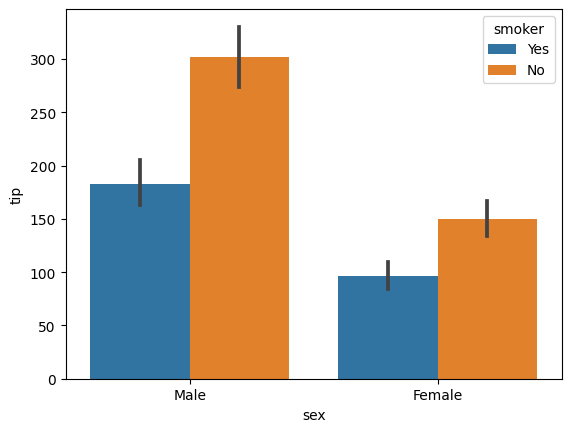

In [ ]:
# Exemplo das mesmas informações com groupby e plot

# Groupby
print(df.groupby(['sex', 'smoker']).tip.sum())

# Seaborn barplot
sns.barplot(data=df, x='sex', y='tip', hue='smoker', estimator=np.sum)

# Plotly barplot
px.bar(data_frame=df, x='sex', y='tip', color='smoker', barmode='group')


## Pivot table

In [ ]:
# primeiras linhas
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# exemplo de pivot: sex - time - tip
df.pivot_table(index='sex', columns='day', values='tip')

# Padrão dos valores é a média

day,Thur,Fri,Sat,Sun
sex,,,,
Male,2.980333,2.693000,3.083898,3.220345
Female,2.575625,2.781111,2.801786,3.367222


In [ ]:
# exemplo de pivot: sex - time - total_bill/tip
df.pivot_table(index='sex', columns='time', values=['total_bill', 'tip'], aggfunc='sum')

tip         total_bill         
time    Lunch  Dinner      Lunch   Dinner
sex                                      
Male    95.11  389.96     595.60  2661.22
Female  90.40  156.11     571.87   999.08

In [ ]:
# exemplo de pivot: sex - time/day - total_bill/tip
df.pivot_table(index='sex', columns=['time', 'day'], values=['total_bill', 'tip'], aggfunc='mean')

tip                                             total_bill  \
time       Lunch        Dinner                                    Lunch   
day         Thur    Fri   Thur       Fri       Sat       Sun       Thur   
sex                                                                       
Male    2.980333  1.900    NaN  3.032857  3.083898  3.220345  18.714667   
Female  2.561935  2.745    3.0  2.810000  2.801786  3.367222  16.648710   

                                                           
time              Dinner                                   
day           Fri   Thur        Fri        Sat        Sun  
sex                                                        
Male    11.386667    NaN  23.487143  20.802542  21.887241  
Female  13.940000  18.78  14.310000  19.680357  19.872222

In [ ]:
# Exemplo com groupby para comparação
df.groupby(['sex', 'time', 'day'])['total_bill', 'tip'].mean()

<ipython-input-13-1fd797c212fa>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['sex', 'time', 'day'])['total_bill', 'tip'].mean()


total_bill       tip
sex    time   day                       
Male   Lunch  Thur   18.714667  2.980333
              Fri    11.386667  1.900000
              Sat          NaN       NaN
              Sun          NaN       NaN
       Dinner Thur         NaN       NaN
              Fri    23.487143  3.032857
              Sat    20.802542  3.083898
              Sun    21.887241  3.220345
Female Lunch  Thur   16.648710  2.561935
              Fri    13.940000  2.745000
              Sat          NaN       NaN
              Sun          NaN       NaN
       Dinner Thur   18.780000  3.000000
              Fri    14.310000  2.810000
              Sat    19.680357  2.801786
              Sun    19.872222  3.367222

In [ ]:
# Exemplo de pivot com múltiplas funções de agregação
df.pivot_table(index='sex', columns='time', values='tip', aggfunc=['mean', np.median, np.std, lambda x: x.sum()])

mean           median              std           <lambda>        
time       Lunch    Dinner  Lunch Dinner     Lunch    Dinner    Lunch  Dinner
sex                                                                          
Male    2.882121  3.144839   2.31    3.0  1.329017  1.529116    95.11  389.96
Female  2.582857  3.002115   2.01    3.0  1.075108  1.193483    90.40  156.11

In [ ]:
# Exemplo de pivot especificando funções em dicionário
agg_dict = {'tip': 'mean', 'total_bill':[np.median, 'min']}

df.pivot_table(index='sex', columns='time', aggfunc= agg_dict)


tip           total_bill                    
            mean               median          min       
time       Lunch    Dinner      Lunch Dinner Lunch Dinner
sex                                                      
Male    2.882121  3.144839      16.58  19.63  7.51   7.25
Female  2.582857  3.002115      13.42  17.19  8.35   3.07

Tabelas no formato long e wide:

In [ ]:
# Selecionando as colunas day,time e tip, a tabela pode ser considerada long, pois elementos se repetem:
df_pivot = df.pivot_table(index='day', columns='time', values='tip').reset_index()
df_pivot

time,day,Lunch,Dinner
0,Thur,2.767705,3.000000
1,Fri,2.382857,2.940000
2,Sat,NaN,2.993103
3,Sun,NaN,3.255132


In [ ]:
# Usando pivot_table, a tabela ficaria no formato wide, pois os elementos não se repetem
df_pivot.melt(id_vars='day') \
.plot.bar(backend='plotly', x='day', y='value', color='time', barmode='group')

**Disclaimer sobre variáveis numéricas:**

Para as variáveis numéricas, alguns algoritmos requerem que os dados estejam **padronizados**. Vimos em data cleaning, ao lidar com outliers, a função `scale` do `sklearn` que padroniza por Z-score. Vale olhar também o `minmax_scale`, outro metódo de pradonização comum que transforma os dados em valores de 0 a 1 (zero sendo o valor mínimo e 1 o máximo).

Também vimos as funções de **transformação** como Box-Cox, que aproxima a distribuição dos dados à uma distribuição normal.

Todos estes métodos já foram abordados e podem ser utilizados para tratar variáveis numéricas para modelos que necessitem deste tratamento.

&nbsp;

---

&nbsp;

**Encoding de variáveis categóricas**

As variáveis categóricas precisam, necessariamente, ser tratadas para que sejam representadas por números, uma vez que os modelos não compreendem texto.

Obs: Alguns modelos podem até permitir input de texto, mas dentro deles eles mesmos fazem essa tratativa de encoding.

Existem duas abordagens principais para encoding de variáveis categóricas:
1. OneHotEncoding: criação de novas colunas para cada categoria informando se esta categoria está ou não presente nas respectivas observações
2. LabelEncoder/OrdinalEncoder: substitui o texto das categorias por números, matendo um "dicionário" para saber ter o mapeamento do que cada número representa.

## OneHotEncoder

Uma opção seria utilizar diretamente o pandas para este propósito:

In [ ]:
# Vamos utilizar como exemplo o dataset de gorjetas em um restaurante
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
pd.get_dummies(df)

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


Ou também podemos utilizar

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# If_binary funicona para quando temos uma coluna que só tem 2 categorias possiveis por exemplo
#  COmo sexo tem só 2 ele não vai separar em duas colunas diferentes

encoder =OneHotEncoder(drop='if_binary')
encoder

OneHotEncoder(drop='if_binary')

In [ ]:
# atribuindo somente as colunas categoricas
categorical_columns = df.select_dtypes(exclude='number').columns

In [ ]:
encoder.fit(df[categorical_columns])

OneHotEncoder(drop='if_binary')

In [ ]:
encoder.drop_idx_

array([0, 0, None, 0], dtype=object)

In [ ]:
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object),
 array(['Dinner', 'Lunch'], dtype=object)]

In [ ]:
encoder.feature_names_in_

array(['sex', 'smoker', 'day', 'time'], dtype=object)

In [ ]:
encoder.get_feature_names_out()


<bound method OneHotEncoder.get_feature_names_out of OneHotEncoder(drop='if_binary')>

In [ ]:
pd.DataFrame(
    encoder.transform(df[categorical_columns]).toarray(),
    columns=encoder.get_feature_names_out()
)

,sex_Male,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Lunch
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
239,1.0,0.0,0.0,1.0,0.0,0.0,0.0
240,0.0,1.0,0.0,1.0,0.0,0.0,0.0
241,1.0,1.0,0.0,1.0,0.0,0.0,0.0
242,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
encoder.transform(
    df[categorical_columns].replace({'Male':'male'})
)

ValueError: Found unknown categories ['male'] in column 0 during transform

## LabelEncoder / OrdinalEncoder

Usando pandas

In [ ]:
# Convertendo para categoria
df_cat =df.copy()

df_cat[categorical_columns] = df_cat[categorical_columns].astype('category')
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
{col :dict(enumerate(df_cat[col].cat.categories)) for col in categorical_columns }

{'sex': {0: 'Male', 1: 'Female'},
 'smoker': {0: 'Yes', 1: 'No'},
 'day': {0: 'Thur', 1: 'Fri', 2: 'Sat', 3: 'Sun'},
 'time': {0: 'Lunch', 1: 'Dinner'}}

In [ ]:
# Pegando das categorias


In [ ]:
# Modificando colunas
df_cat[categorical_columns] = df_cat[categorical_columns].apply(lambda x: x.cat.codes)

,sex,smoker,day,time
0,1,1,3,1
1,0,1,3,1
2,0,1,3,1
3,0,1,3,1
4,1,1,3,1
...,...,...,...,...
239,0,1,2,1
240,1,0,2,1
241,0,0,2,1
242,0,1,2,1


In [ ]:
df_cat.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Usando factorize
df['sex'].factorize()

(array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 0]),
 CategoricalIndex(['Female', 'Male'], categories=['Male', 'Female'], ordered=False, dtype='category'))

Usando sklearn

In [65]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
OrdinalEncoder?

In [ ]:
# Instanciando OrginalEncoder
encoder = OrdinalEncoder().fit(df[categorical_columns])

In [ ]:
# Mostrando os atributos
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object),
 array(['Dinner', 'Lunch'], dtype=object)]

In [ ]:
# Transformando dados esperados
df_cat[categorical_columns] = encoder.transform(df[categorical_columns])

In [ ]:
df_cat.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0.0,0.0,2.0,0.0,2
1,10.34,1.66,1.0,0.0,2.0,0.0,3
2,21.01,3.50,1.0,0.0,2.0,0.0,3
3,23.68,3.31,1.0,0.0,2.0,0.0,2
4,24.59,3.61,0.0,0.0,2.0,0.0,4


# Filtros

# New Section

In [ ]:
# Filtro convencional

df[df.tip>4]

,total_bill,tip,sex,smoker,day,time,size
5,25.29,4.71,Male,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
20,17.92,4.08,Male,No,Sat,Dinner,2
23,39.42,7.58,Male,No,Sat,Dinner,4
28,21.70,4.30,Male,No,Sat,Dinner,2
39,31.27,5.00,Male,No,Sat,Dinner,3
44,30.40,5.60,Male,No,Sun,Dinner,4
46,22.23,5.00,Male,No,Sun,Dinner,2
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4


In [ ]:
# Query
df.query('tip>4').head()

,total_bill,tip,sex,smoker,day,time,size
5,25.29,4.71,Male,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
20,17.92,4.08,Male,No,Sat,Dinner,2
23,39.42,7.58,Male,No,Sat,Dinner,4
28,21.70,4.30,Male,No,Sat,Dinner,2


In [ ]:
# filtro co mquery e veriável
minimo = 3
df.query(f'tip>{minimo}')

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
219,30.14,3.09,Female,Yes,Sat,Dinner,4
221,13.42,3.48,Female,Yes,Fri,Lunch,2
232,11.61,3.39,Male,No,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3


In [ ]:
# Multiplos filtros convencionais
df[ (df.tip> 2) & (df.total_bill<20)]

,total_bill,tip,sex,smoker,day,time,size
9,14.78,3.23,Male,No,Sun,Dinner,2
13,18.43,3.00,Male,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
17,16.29,3.71,Male,No,Sun,Dinner,3
18,16.97,3.50,Female,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
228,13.28,2.72,Male,No,Sat,Dinner,2
231,15.69,3.00,Male,Yes,Sat,Dinner,3
232,11.61,3.39,Male,No,Sat,Dinner,2
234,15.53,3.00,Male,Yes,Sat,Dinner,2


In [ ]:
# Multiplos filtros com query
df.query('tip> 2 and total_bill<20')

,total_bill,tip,sex,smoker,day,time,size
9,14.78,3.23,Male,No,Sun,Dinner,2
13,18.43,3.00,Male,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
17,16.29,3.71,Male,No,Sun,Dinner,3
18,16.97,3.50,Female,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
228,13.28,2.72,Male,No,Sat,Dinner,2
231,15.69,3.00,Male,Yes,Sat,Dinner,3
232,11.61,3.39,Male,No,Sat,Dinner,2
234,15.53,3.00,Male,Yes,Sat,Dinner,2


In [ ]:
# Filtro com index
df_index = df.set_index('sex')
df_index

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,16.99,1.01,No,Sun,Dinner,2
Male,10.34,1.66,No,Sun,Dinner,3
Male,21.01,3.50,No,Sun,Dinner,3
Male,23.68,3.31,No,Sun,Dinner,2
Female,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
Male,29.03,5.92,No,Sat,Dinner,3
Female,27.18,2.00,Yes,Sat,Dinner,2
Male,22.67,2.00,Yes,Sat,Dinner,2


In [ ]:
# Filtrar listas
df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
df[df.day.isin(['Sat', 'Sun'])].head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df_index.iloc[1:5]

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,10.34,1.66,No,Sun,Dinner,3
Male,21.01,3.50,No,Sun,Dinner,3
Male,23.68,3.31,No,Sun,Dinner,2
Female,24.59,3.61,No,Sun,Dinner,4


In [ ]:
df_index.loc['Female', ['total_bill','tip']]

,total_bill,tip
sex,,
Female,16.99,1.01
Female,24.59,3.61
Female,35.26,5.00
Female,14.83,3.02
Female,10.33,1.67
...,...,...
Female,10.09,2.00
Female,22.12,2.88
Female,35.83,4.67


Filtrando data

In [ ]:
# Loading aircrash dataset
fatalities_dataset_path = 'https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz'
df_datetime = pd.read_csv(fatalities_dataset_path, usecols=['Date','Fatalities'], parse_dates=['Date'], index_col='Date').sort_index()
df_datetime.head()

,Fatalities
Date,
1908-09-17,1.0
1912-07-12,5.0
1913-08-06,1.0
1913-09-09,14.0
1913-10-17,30.0


In [ ]:
# filtrando com loc
df_datetime.loc['2000': '2010-05-10']
# ou
# df_datetime.loc['2000-05-10']


,Fatalities
Date,
2000-01-05,1.0
2000-01-10,10.0
2000-01-13,22.0
2000-01-15,5.0
2000-01-25,4.0
...,...
2009-05-20,98.0
2009-05-26,4.0
2009-06-01,228.0


In [ ]:
# Resetando Index
df = df_datetime.reset_index()
df

,Date,Fatalities
0,1908-09-17,1.0
1,1912-07-12,5.0
2,1913-08-06,1.0
3,1913-09-09,14.0
4,1913-10-17,30.0
...,...,...
5263,2009-05-20,98.0
5264,2009-05-26,4.0
5265,2009-06-01,228.0
5266,2009-06-07,1.0


In [ ]:
# filtrando com filtro convencional de coluna - between
df[df.Date.between('2000-05-10', '2010-05-10')]

,Date,Fatalities
4710,2000-05-10,6.0
4711,2000-05-17,3.0
4712,2000-05-21,19.0
4713,2000-05-25,1.0
4714,2000-05-25,1.0
...,...,...
5263,2009-05-20,98.0
5264,2009-05-26,4.0
5265,2009-06-01,228.0
5266,2009-06-07,1.0


In [ ]:
# Filtrando com filtro convencional de coluna - gt/lt
df[(df.Date>='2000-05-10') & (df.Date.le('2010-05-10'))]

,Date,Fatalities
4710,2000-05-10,6.0
4711,2000-05-17,3.0
4712,2000-05-21,19.0
4713,2000-05-25,1.0
4714,2000-05-25,1.0
...,...,...
5263,2009-05-20,98.0
5264,2009-05-26,4.0
5265,2009-06-01,228.0
5266,2009-06-07,1.0


# Enriquecimento (Feature Engineering)

Feature engineering, ou enriquecimento, consiste em uma das etapas mais importantes para construir bons modelos de machine learning.

O objetivo da feature engineering é tornar os dados melhor aproveitáveis para resolver o problema proposto. Através da feature engineering, podemos:

- Melhor a performance preditiva do modelo
- Reduzir custos computacionais ou necessidades de dados
- Aumentar a interpretabilidade dos resultados

Novas features podem ser geradas a partir das próprias features do datataset através de operações aritméticas simples. Conside por exemplo o dataset de gorjetas previamente estudado:

In [22]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
# tips = sns.load_dataset("tips")

# Create a visualization
# sns.relplot(
#     data=tips,
#     x="total_bill", y="tip", col="time",
#     hue="smoker", style="smoker", size="size",
# )

In [27]:
# df = sns.load_dataset('tips')
df = pd.read_csv('/content/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Neste caso, poderíamos adicionar uma coluna que representa o quanto a gorjeta representa da conta total, ou o valor da conta divido pelo tamanho da mesa (size):

In [28]:
# Criando uma nova coluna que é a proporção de um valor em relação a outro
df['tip_normalized'] = df['tip'] / df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_normalized
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


Lembre-se, contudo, que para um modelo supervisionado de machine learning, todas as features trabalhadas no treino devem ser possíveis de serem utilizada em novos dados que virão também, como input do modelo.

Outra maneira de adicionar colunas consiste em capturar categorias mais específicas em uma variável categórica com texto.

Por exemplo, considere a base de dados do Titanic:

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Nesta base, o nome do completo do passageiro não seria útil, visto que são nomes únicos. Contudo, há um tratamento pessoal em cada nome (como Mr., Mrs.) e isso poderia contribuir para melhor performance do modelo.

In [39]:
# Str é um acessor dos método de string, nesse exemplo queremos aquilo que está depois da vírgula e antes do .
# Usaremos um regex para pegar esse dado
df['personal_title'] =  df.Name.str.extract('.+?, (.+?)\.', expand=False)
df.head()

# Aqui um dos melhores exemplos de enriquecimento, estamos usando a maneira que as pessoas são chamadas para criar novas possbilidades de analise

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,personal_title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


## Selecionando features

A parte de seleção de features também é muito importante e o domínio de negócio/área conta muito aqui.

### Análise gráfica

<Axes: xlabel='Pclass', ylabel='Age'>

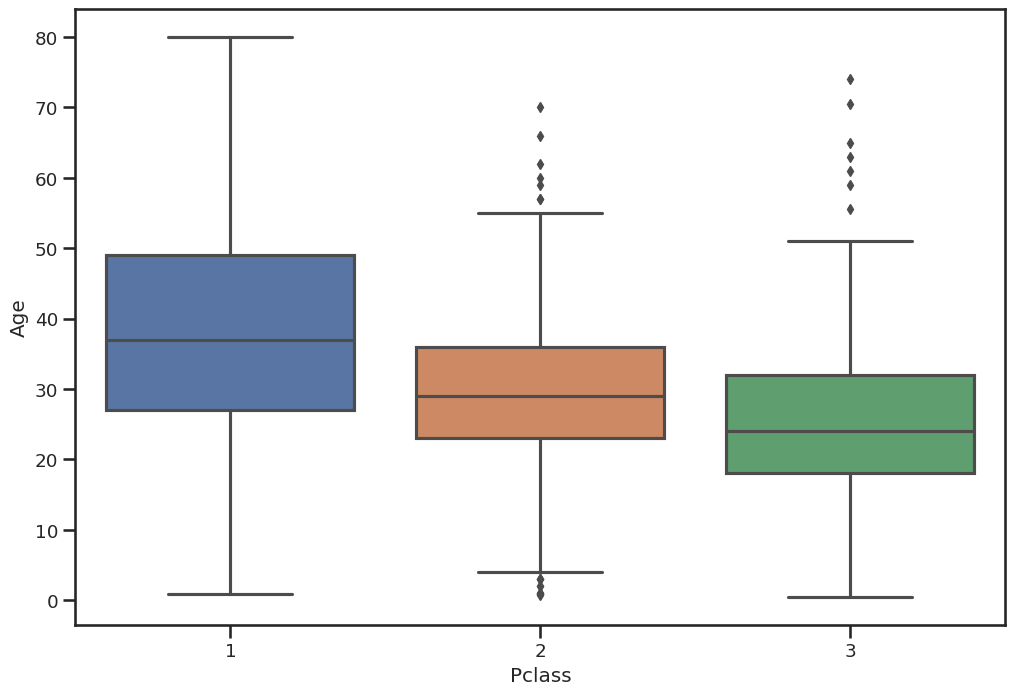

In [46]:
# Observando diferenças nas distribuições
sns.boxplot(data=df, x='Pclass', y='Age')

<Axes: xlabel='Pclass', ylabel='Survived'>

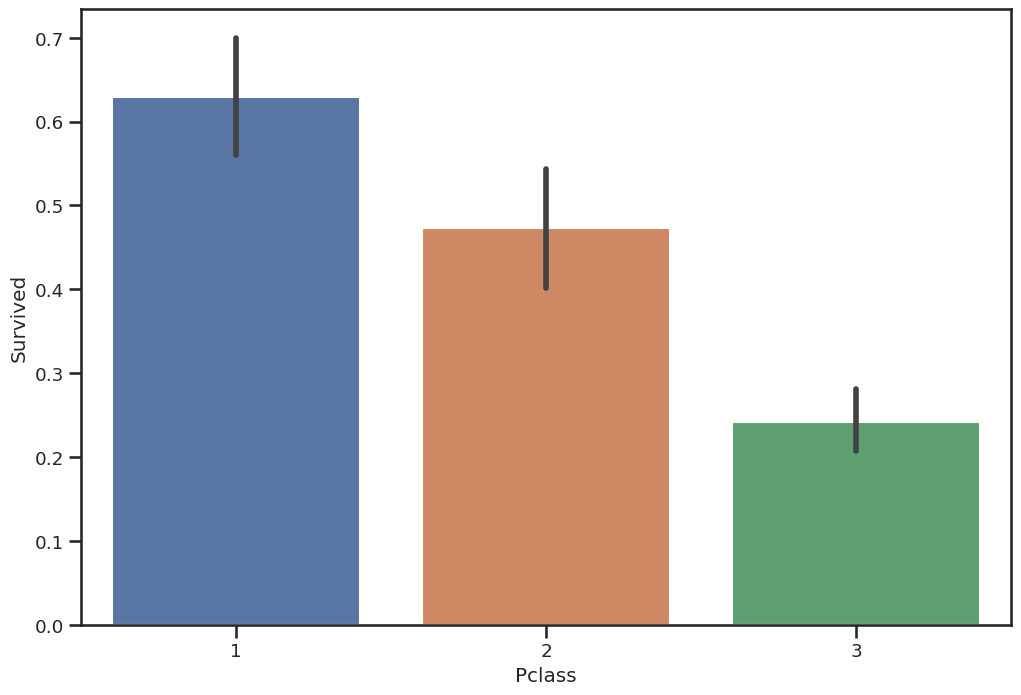

In [47]:
# Uma das melhores analises que podemos fazer nesse data set
sns.barplot(data=df, x='Pclass', y='Survived')

<Axes: xlabel='Pclass', ylabel='Age'>

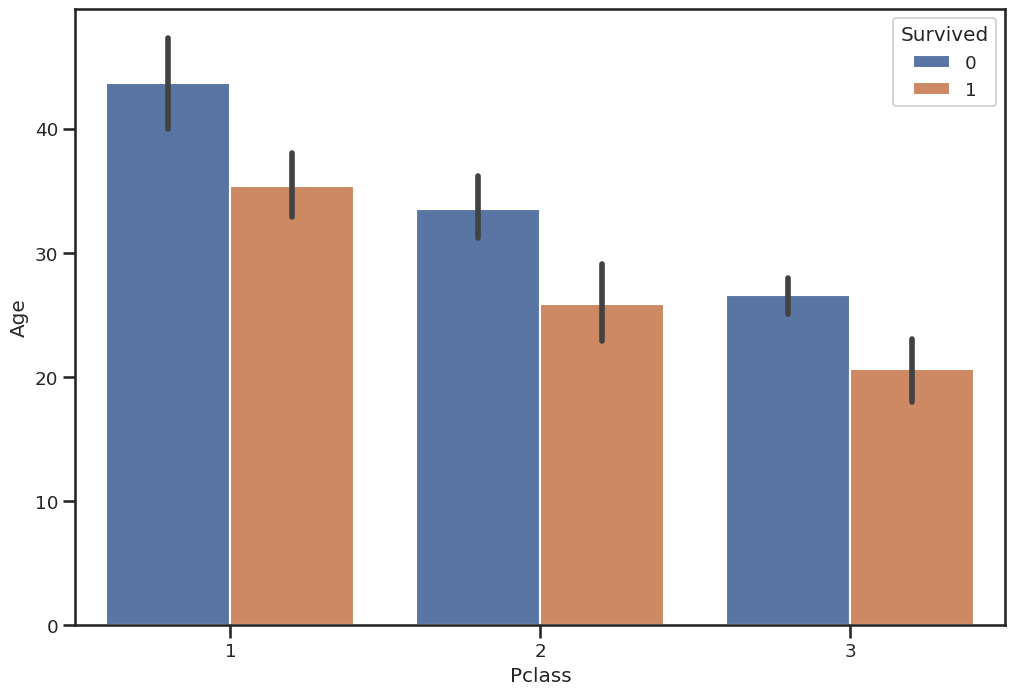

In [50]:
sns.barplot(data=df, x='Pclass', y='Age', hue='Survived')

In [51]:
# Observando correlação (linear)
df.corr()

<ipython-input-51-b2f37c5bba3d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<ipython-input-55-b468bcb6deb0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='RdBu_r', center =0, annot=True)


<Axes: >

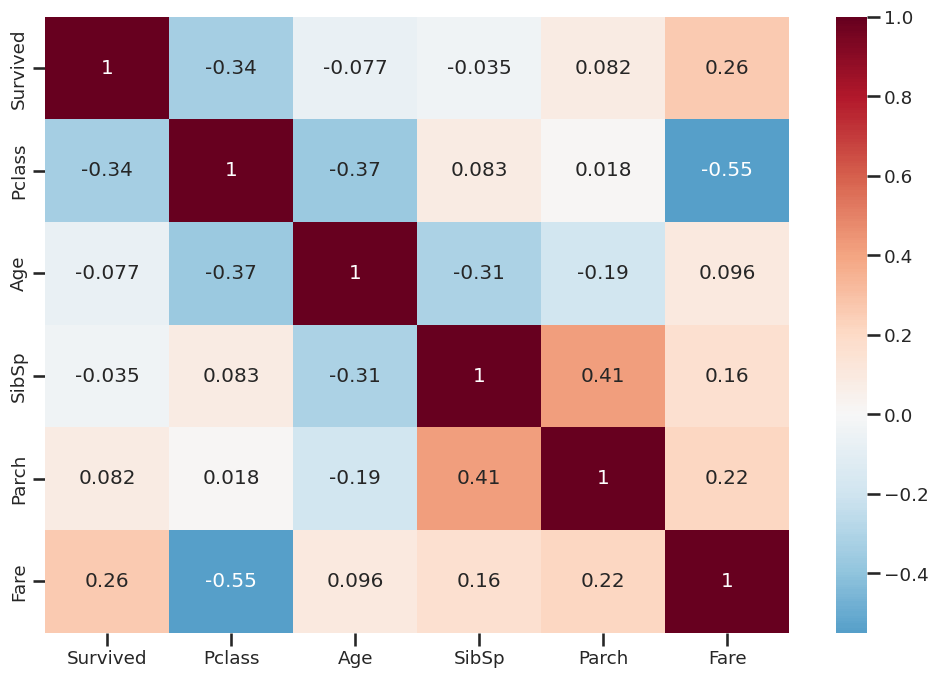

In [55]:
# Observando correlação (linear) - com gráfico
sns.heatmap(df.corr(), cmap='RdBu_r', center =0, annot=True)

# Aqui temos que a relação da classe com a sobrevivenci a está bem chamativa

### Mutual information

In [56]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

In [57]:
# Drop columns and NAs
df_model = df.drop(columns=['Name','Ticket', 'Cabin']).dropna()
df_model.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_title
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr
2,1,1,female,38.0,1,0,71.2833,C,Mrs
3,1,3,female,26.0,0,0,7.9250,S,Miss
4,1,1,female,35.0,1,0,53.1000,S,Mrs
5,0,3,male,35.0,0,0,8.0500,S,Mr


In [60]:
target = df_model['Survived']
df_features = df_model.drop(columns='Survived')

In [72]:
df_model.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_title
PassengerId,,,,,,,,,
1,0,3,1.0,22.0,1,0,7.2500,2.0,11.0
2,1,1,0.0,38.0,1,0,71.2833,0.0,12.0
3,1,3,0.0,26.0,0,0,7.9250,2.0,8.0
4,1,1,0.0,35.0,1,0,53.1000,2.0,12.0
5,0,3,1.0,35.0,0,0,8.0500,2.0,11.0


In [78]:
# Selecionando apenas as colunas numericas
cat_features = df_features.select_dtypes(exclude='number').columns

encoder = OrdinalEncoder()
df_features[cat_features] = encoder.fit_transform(df_features[cat_features]).astype(int)

df_features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_title
PassengerId,,,,,,,,
1,3,1,22.0,1,0,7.2500,2,11
2,1,0,38.0,1,0,71.2833,0,12
3,3,0,26.0,0,0,7.9250,2,8
4,1,0,35.0,1,0,53.1000,2,12
5,3,1,35.0,0,0,8.0500,2,11


In [79]:
discrete_features = df_features.dtypes==int
discrete_features

Pclass             True
Sex                True
Age               False
SibSp              True
Parch              True
Fare              False
Embarked           True
personal_title     True
dtype: bool

In [81]:
scores = mutual_info_classif(X=df_features, y=target, discrete_features=discrete_features)
scores

array([0.06516276, 0.14840857, 0.0200405 , 0.01723787, 0.02126715,
       0.13655302, 0.01930984, 0.17785974])

<Axes: >

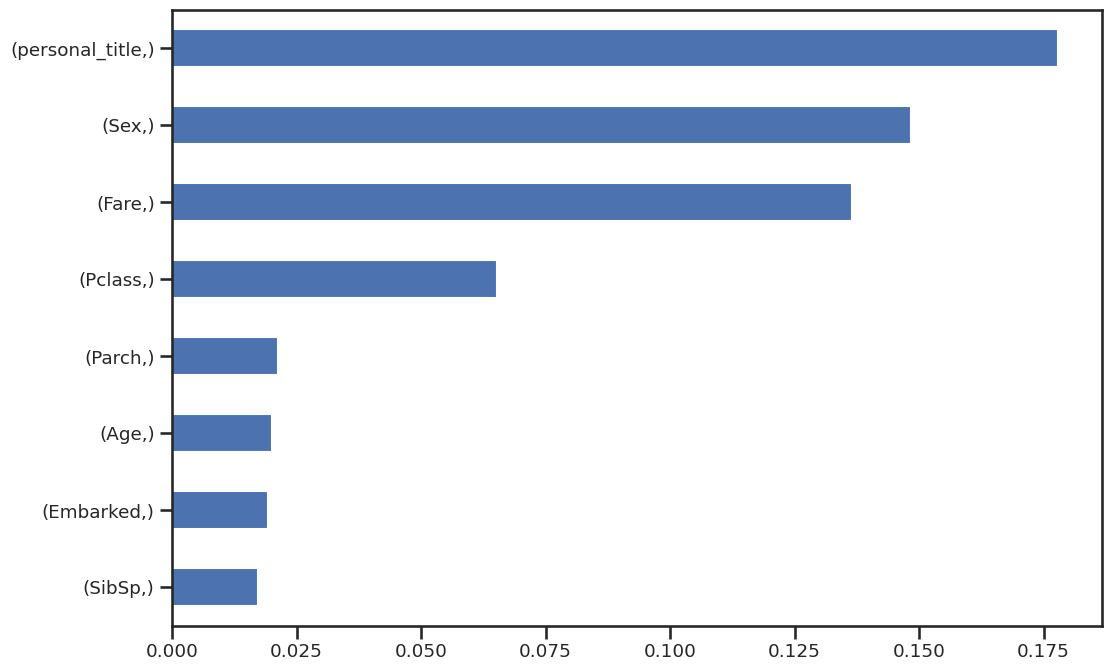

In [89]:
pd.Series(data=scores, index=[df_features.columns]).sort_values().plot.barh()

**Observação:** MI, assim como correlação, é uma métrica **univariada**, portanto, não necessariamente uma variável com baixo score de MI vai ter pouca importância para o modelo, pois pode ser que, quando associada à outra variável, ambas variáveis contribuam para o modelo.

# Pipelines

In [90]:
from sklearn import set_config
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder

set_config(display="diagram")

In [91]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col='PassengerId')
df['personal_titles'] = df.Name.str.extract('.*, (.+?)\.', expand=False)
df = df.drop(columns=['Name','Ticket','Cabin']).dropna()

df_features = df.drop(columns='Survived')
target = df['Survived']

df_features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_titles
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,Mr
2,1,female,38.0,1,0,71.2833,C,Mrs
3,3,female,26.0,0,0,7.9250,S,Miss
4,1,female,35.0,1,0,53.1000,S,Mrs
5,3,male,35.0,0,0,8.0500,S,Mr


In [92]:
# Selecionando features numéricas e categóricas
numerical_features = df_features.select_dtypes('number').columns
categorical_features = df_features.select_dtypes(exclude='number').columns

print(numerical_features)
print(categorical_features)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Sex', 'Embarked', 'personal_titles'], dtype='object')


In [93]:
# Aplicando o help
make_column_transformer?

In [95]:
# Aplicando column transformer
preprocessing_pipeline = make_column_transformer(
    [StandardScaler(), numerical_features],
    [OrdinalEncoder(), categorical_features],

)

In [96]:
preprocessing_pipeline

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                ('ordinalencoder', OrdinalEncoder(),
                                 Index(['Sex', 'Embarked', 'personal_titles'], dtype='object'))])

In [97]:
preprocessing_pipeline.fit(df_features)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                ('ordinalencoder', OrdinalEncoder(),
                                 Index(['Sex', 'Embarked', 'personal_titles'], dtype='object'))])

In [100]:
pd.DataFrame(

  preprocessing_pipeline.transform(df_features),
  columns=preprocessing_pipeline.get_feature_names_out()

)


,standardscaler__Pclass,standardscaler__Age,standardscaler__SibSp,standardscaler__Parch,standardscaler__Fare,ordinalencoder__Sex,ordinalencoder__Embarked,ordinalencoder__personal_titles
0,0.908600,-0.527669,0.522511,-0.506787,-0.516380,1.0,2.0,11.0
1,-1.482983,0.577094,0.522511,-0.506787,0.694046,0.0,0.0,12.0
2,0.908600,-0.251478,-0.552714,-0.506787,-0.503620,0.0,2.0,8.0
3,-1.482983,0.369951,0.522511,-0.506787,0.350326,0.0,2.0,12.0
4,0.908600,0.369951,-0.552714,-0.506787,-0.501257,1.0,2.0,11.0
...,...,...,...,...,...,...,...,...
707,0.908600,0.646142,-0.552714,5.350885,-0.102875,0.0,1.0,12.0
708,-0.287191,-0.182430,-0.552714,-0.506787,-0.407687,1.0,2.0,14.0
709,-1.482983,-0.734812,-0.552714,-0.506787,-0.086335,0.0,2.0,8.0
710,-1.482983,-0.251478,-0.552714,-0.506787,-0.086335,1.0,0.0,11.0


In [101]:
# Múltiplos processamentos no column transformer
# Aplicando column transformer
preprocessing_pipeline = make_column_transformer(
    [make_pipeline(PowerTransformer(), StandardScaler()), numerical_features],
    [OneHotEncoder(), categorical_features]
)

preprocessing_pipeline.fit(df_features)

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('powertransformer',
                                                  PowerTransformer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                ('onehotencoder', OneHotEncoder(),
                                 Index(['Sex', 'Embarked', 'personal_titles'], dtype='object'))])

In [102]:
# Colocando resultado em dataframe
pd.DataFrame(
  data=preprocessing_pipeline.transform(df_features).toarray(),
  columns=preprocessing_pipeline.get_feature_names_out()
)

,pipeline__Pclass,pipeline__Age,pipeline__SibSp,pipeline__Parch,pipeline__Fare,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,...,onehotencoder__personal_titles_Master,onehotencoder__personal_titles_Miss,onehotencoder__personal_titles_Mlle,onehotencoder__personal_titles_Mme,onehotencoder__personal_titles_Mr,onehotencoder__personal_titles_Mrs,onehotencoder__personal_titles_Ms,onehotencoder__personal_titles_Rev,onehotencoder__personal_titles_Sir,onehotencoder__personal_titles_the Countess
0,0.940654,-0.469528,1.290366,-0.609138,-0.997650,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.409998,0.609720,1.290366,-0.609138,1.287757,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.940654,-0.186239,-0.716478,-0.609138,-0.901073,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.409998,0.417070,1.290366,-0.609138,1.024276,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.940654,0.417070,-0.716478,-0.609138,-0.884112,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.940654,0.673133,-0.716478,1.785665,0.455301,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
708,-0.430593,-0.117045,-0.716478,-0.609138,-0.369789,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
709,-1.409998,-0.689838,-0.716478,-0.609138,0.484313,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
710,-1.409998,-0.186239,-0.716478,-0.609138,0.484313,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Conclusão do módulo

Neste módulo, vocês aprenderam:

- Como identificar e lidar com valores duplicados
- Como identificar e lidar com valores faltantes
- Como identificar e lidar com outliers
- Como identificar e lidar com dados inconsistentes através de análise univariada
- Como identificar variáveis potencialmente importantes para o modelo através da análise multivariada
- Como transformar seus dados numéricos e categóricos para aplicação do modelo
- Como estruturar os seus dados
- Como criar novas variáveis para o modelo
- Como estruturar um pipeline de pré-tratamento dos dados

In [105]:
import seaborn as sns
# df = sns.load_dataset('tips')
# ou
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
